# Imports

In [1]:
import pandas as pd
import pathlib
import string
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import operator
from collections import Counter
import matplotlib.pyplot as plt

C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

# Functions

In [2]:
#converting a dataframe into a single list 
#text is split into words defined by their space inbetween
#words are inserted into list 



def words_list(text):
    #words are inserted into list 
    corpus=[]
    for row in text:
        tokens = row[0].split(" ")
        for token in tokens:
            corpus.append(token)
    
    
    def vocabulary_list(corpus):
        #initlialize the vocabulary
        vocab = list(set(" ".join(corpus)))
        vocab.remove(' ')
        return vocab
      
    
    def split_words_char(corpus):
        #split the word into characters
        corpus = [" ".join(token) for token in corpus]
        #appending </w>
        corpus=[token+' </w>' for token in corpus]
        return corpus
        
    x,y = split_words_char(corpus), vocabulary_list(corpus)
    return x,y


def del_punctuations(words):
    punctuation_table = str.maketrans('', '', string.punctuation)
    words = [word.translate(punctuation_table).lower() for word in words]
    return words

def token_sentences(text):
    sentences = sent_tokenize(text)
    return sentences


def tokenization(words, text):
    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]   
    return words


def stop_words(words):
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    return words



def word_frequency(words):
    frequency_words = collections.Counter(words)
    
    #convert counter object to dictionary
    frequency_words_dict = dict(frequency_words)
    res = dict(sorted(frequency_words_dict.items(), key=lambda item: item[1]))
    return res

def top_20_most_common_words(freq_words):
    res = dict(Counter(freq_words).most_common(20))
    return res

def most_common_words(dictionary):
    # Output a dict of most common words
    return dict(sorted(dictionary.items(),key=lambda x: x[1], reverse=True))

def least_common_words(dictionary):
    return sorted(list(dictionary.items()),key=lambda x: x[1])

# TASK 1.1: TOKENIZATION
_ splitting text files into words _


## Text file: Emoji

### Read in txt files: offensive/emoji.txt

In [3]:
file_path_val = pathlib.Path(r'datasets/emoji/val_text.txt')

with open(file_path_val, 'r',encoding="utf8") as f:
    emoji_text_val = f.read()       
    f.close()
    
emoji_words_val_txt = emoji_text_val[1:].split()

print(emoji_words_val_txt[:100])

['little', 'throwback', 'with', 'my', 'favourite', 'person', '@', 'Water', 'Wall', 'glam', 'on', '@user', 'yesterday', 'for', '#kcon', 'makeup', 'using', '@user', 'in', '#featherette,…', 'Democracy', 'Plaza', 'in', 'the', 'wake', 'of', 'a', 'stunning', 'outcome', '#Decision2016', '@', 'NBC', 'News', 'Then', '&amp;', 'Now.', 'VILO', '@', 'Walt', 'Disney', 'Magic', 'Kingdom', 'Who', 'never...', '@', 'A', 'Galaxy', 'Far', 'Far', 'Away', 'Dinner', 'in', 'FLA', 'tonight', '//', 'Pan-seared', 'salmon', 'over', 'couscous', 'veggie', 'salad', '#yum', '#dinner', '#florida', '#salmon…', "It's", 'my', 'fav', 'seniors', 'last', 'game', 'congrats', 'on', 'beating', 'west', '@', 'West', 'Salem…', 'I', 'got', 'to', 'to', 'go', 'formal', 'with', 'my', 'best', 'friend', '@', 'Phi', 'Mu', 'at', 'JSU', "'Cause", 'I', 'Miss', 'My', 'Little', 'Homies', '.#Throwback']


In [4]:
file_path_train = pathlib.Path(r'datasets/emoji/train_text.txt')


with open(file_path_train, 'r',encoding="utf8") as f:
    emoji_text_train = f.read()       
    f.close()
    
emoji_words_train_txt = emoji_text_train[1:].split()
print(emoji_words_train_txt[:100])

['unday', 'afternoon', 'walking', 'through', 'Venice', 'in', 'the', 'sun', 'with', '@user', '️', '️', '️', '@', 'Abbot', 'Kinney,', 'Venice', 'Time', 'for', 'some', 'BBQ', 'and', 'whiskey', 'libations.', 'Chomp,', 'belch,', 'chomp!', '(@', "Lucille's", 'Smokehouse', 'Bar-B-Que)', 'Love', 'love', 'love', 'all', 'these', 'people', '️', '️', '️', '#friends', '#bff', '#celebrate', '#blessed', '#sundayfunday', '@', 'San…', '️', '️', '️', '️', '@', 'Toys"R"Us', 'Man', 'these', 'are', 'the', 'funniest', 'kids', 'ever!!', 'That', 'face!', '#HappyBirthdayBubb', '@', 'FLIPnOUT', 'Xtreme', '#sandiego', '@', 'San', 'Diego,', 'California', 'My', 'little', '️', '️', '️', '️', '️', '#ObsessedWithMyDog', '@', 'Cafe', 'Solstice', 'Capitol', 'Hill', 'More', '#tinyepic', 'things', '#tinyepicwestern,', 'this', 'one', 'is', 'crazy', '@user', 'I', 'may', 'be', 'one', 'of', 'your…', 'Last']


In [5]:
file_path_test = pathlib.Path(r'datasets/emoji/test_text.txt')


with open(file_path_test, 'r',encoding="utf8") as f:
    emoji_text_test = f.read()       
    f.close()
    
emoji_words_test_txt = emoji_text_test[1:].split()
print(emoji_words_test_txt[:100])

['n', 'Pelham', 'Parkway', 'The', 'calm', 'before......', '|', 'w/', 'sofarsounds', '@user', '|', ':', 'B.', 'Hall.......#sofarsounds…', 'Just', 'witnessed', 'the', 'great', 'solar', 'eclipse', '@', 'Tampa,', 'Florida', 'This', 'little', 'lady', 'is', '26', 'weeks', 'pregnant', 'today!', 'Excited', 'for', 'baby', 'Cam', 'to', 'come!', '@', 'Springfield,…', 'Great', 'road', 'trip', 'views!', '@', 'Shartlesville,', 'Pennsylvania', 'CHRISTMAS', 'DEALS', 'BUY', 'ANY', '3', 'SMALL', 'POMADES', '1.5', 'OR', '1.7', 'OZ', 'RECEIVE', 'THE', 'F&amp;S', 'COLLECTOR', 'TIN', '&amp;', 'COMB…', 'the', '#sisterstunt', 'was', 'mad', 'real', 'last', 'night', '#MiaStaxxx', '#AndreaStaxxx', '#denverqueen', '#staxxxlife…', "I'm", 'starting', 'to', 'love', 'shooting', 'in', 'the', 'dark', '#brandonwolfel', '@', 'New', 'York,', 'New', 'York', 'Let', 'the', 'sun', 'shine', 'through', '️', '5x5', 'Feet', '#oilpainting', '#oiloncanvas', '#acrylicpainting']


### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [6]:


emoji_cleaned_val_words = del_punctuations(emoji_words_val_txt)
emoji_cleaned_train_words = del_punctuations(emoji_words_train_txt)
emoji_cleaned_test_words = del_punctuations(emoji_words_test_txt)

print('val_text.txt:\n',emoji_cleaned_val_words[:100],'\n')

print('\nval_train.txt:\n',emoji_cleaned_train_words[:100], '\n')

print('\nval_test.txt:\n',emoji_cleaned_test_words[:100],'\n')

val_text.txt:
 ['little', 'throwback', 'with', 'my', 'favourite', 'person', '', 'water', 'wall', 'glam', 'on', 'user', 'yesterday', 'for', 'kcon', 'makeup', 'using', 'user', 'in', 'featherette…', 'democracy', 'plaza', 'in', 'the', 'wake', 'of', 'a', 'stunning', 'outcome', 'decision2016', '', 'nbc', 'news', 'then', 'amp', 'now', 'vilo', '', 'walt', 'disney', 'magic', 'kingdom', 'who', 'never', '', 'a', 'galaxy', 'far', 'far', 'away', 'dinner', 'in', 'fla', 'tonight', '', 'panseared', 'salmon', 'over', 'couscous', 'veggie', 'salad', 'yum', 'dinner', 'florida', 'salmon…', 'its', 'my', 'fav', 'seniors', 'last', 'game', 'congrats', 'on', 'beating', 'west', '', 'west', 'salem…', 'i', 'got', 'to', 'to', 'go', 'formal', 'with', 'my', 'best', 'friend', '', 'phi', 'mu', 'at', 'jsu', 'cause', 'i', 'miss', 'my', 'little', 'homies', 'throwback'] 


val_train.txt:
 ['unday', 'afternoon', 'walking', 'through', 'venice', 'in', 'the', 'sun', 'with', 'user', '️', '️', '️', '', 'abbot', 'kinney', 'venice

In [7]:

#nltk.download('punkt')



emoji_sentences_val_txt = token_sentences(emoji_text_val)   
emoji_sentences_train_txt = token_sentences(emoji_text_train)
emoji_sentences_test_txt = token_sentences(emoji_text_test)   

print(emoji_sentences_val_txt[:5])
print(emoji_sentences_train_txt[:5])
print(emoji_sentences_test_txt[:5])

['A little throwback with my favourite person @ Water Wall\nglam on @user yesterday for #kcon makeup using @user in #featherette,…\nDemocracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News\nThen &amp; Now.', "VILO @ Walt Disney Magic Kingdom\nWho never... @ A Galaxy Far Far Away\nDinner in FLA tonight // Pan-seared salmon over couscous veggie salad #yum #dinner #florida #salmon…\nIt's my fav seniors last game congrats on beating west @ West Salem…\nI got to to go formal with my best friend @ Phi Mu at JSU\n'Cause I Miss My Little Homies .#Throwback #CousinLove @ Indiana University\nBirthday Kisses @ Madison, Wisconsin\nGreat time in Tuscaloosa with my girl!", '@ Bryant–Denny Stadium\nA seguir aprendiendo del mundo de las berries (@ John F. Kennedy International Airport (JFK) in Queens, NY, NY)\n#livinginparadise @ Ramada Plaza Beach Resort\n••In order for your life to be "GREAT" you must first learn to "APPRECIATE" it... •• #Ny…\nThese girls!', '#seniors2016 #memories

### Number of words in each tokenization variables

In [8]:

emoji_token_val = tokenization(emoji_cleaned_val_words, emoji_text_val)
emoji_token_train = tokenization(emoji_cleaned_train_words, emoji_text_train)
emoji_token_test = tokenization(emoji_cleaned_test_words, emoji_text_test)

print(f'Number of words in tokenization for val_text: {len(emoji_token_val)}')
print(f'Number of words in tokenization for val_train: {len(emoji_token_train)}')
print(f'Number of words in tokenization for val_test: {len(emoji_token_test)}')

Number of words in tokenization for val_text: 49591
Number of words in tokenization for val_train: 460902
Number of words in tokenization for val_test: 517054


### Removing stopwords like 'and, or, of, is, had.... etc' 

In [9]:
emoji_cleaned_val_words = stop_words(emoji_token_val)
emoji_cleaned_train_words = stop_words(emoji_token_train)
emoji_cleaned_test_words = stop_words(emoji_token_test)

print(f'Number of words after removing Stop Words: {len(emoji_cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(emoji_cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(emoji_cleaned_test_words)}')


Number of words after removing Stop Words: 33580
Number of words after removing Stop Words: 314127
Number of words after removing Stop Words: 345189


### Frequency of each word

In [10]:
import collections

#returns frequency of each word



emoji_freq_words_val = word_frequency(emoji_cleaned_val_words)
emoji_freq_words_train = word_frequency(emoji_cleaned_train_words)
emoji_freq_words_test = word_frequency(emoji_cleaned_test_words)


print('_'*112,'\n')
print('Frequency of words in val_text:\n',list(emoji_freq_words_val.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in train_text:\n',list(emoji_freq_words_train.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(emoji_freq_words_test.items())[-40:-1], '\n')
print('_'*112,'\n')

________________________________________________________________________________________________________________ 

Frequency of words in val_text:
 [('friends', 76), ('high', 76), ('much', 78), ('fun', 78), ('first', 79), ('school', 81), ('life', 82), ('thank', 82), ('thanks', 86), ('center', 87), ('california', 87), ('see', 87), ('get', 89), ('city', 91), ('great', 96), ('back', 96), ('ca', 98), ('little', 99), ('university', 103), ('beautiful', 106), ('christmas', 116), ('like', 118), ('birthday', 119), ('last', 120), ('one', 125), ('today', 133), ('best', 136), ('got', 137), ('time', 137), ('good', 137), ('beach', 147), ('york', 148), ('night', 151), ('park', 152), ('day', 223), ('happy', 225), ('amp', 245), ('new', 292), ('love', 389)] 

________________________________________________________________________________________________________________ 

Frequency of words in train_text:
 [('city', 736), ('francisco', 746), ('great', 751), ('fun', 756), ('little', 778), ('see', 783), (

### Vocabulary list for offensive text files
_Looking through vocabulary lists can help you find problems
(especially tokens that only occur once or twice)._

In [11]:


emoji_corpus_val, emoji_vocab_val = words_list(emoji_text_val)
emoji_corpus_train, emoji_vocab_train = words_list(emoji_text_train)
emoji_corpus_test, emoji_vocab_test = words_list(emoji_text_test)

print('Vocabulary for text_val.txt:\n', emoji_vocab_val[:20],'\n')
print('Vocabulary for text_train.txt:\n', emoji_vocab_train[:20],'\n')
print('Vocabulary for text_test.txt:\n', emoji_vocab_test[:20],'\n')

Vocabulary for text_val.txt:
 ['T', '’', '⚘', '朝', 'D', '_', 'ø', '海', '新', '€', '.', '⃣', '£', 'ス', 'Δ', 'ポ', 'L', 'Χ', 'ö', 'A'] 

Vocabulary for text_train.txt:
 ['ｕ', 'こ', '後', '留', '最', '램', '先', '文', 'Ｒ', '불', 'β', '廳', 'ᵁ', '챗', 'Δ', '็', 'ö', 'テ', 'ᴴ', 'V'] 

Vocabulary for text_test.txt:
 ['ｕ', '𝓈', 'こ', 'ⓟ', 'ø', 'Ｒ', 'ᵁ', 'Δ', 'ö', 'ᴴ', 'V', 'ɪ', 'ッ', 'y', '℉', 'い', '⛇', 'M', 'h', 'ā'] 



### Read in txt files: offensive/val_text.txt

In [12]:
#offensive_

In [13]:
file_path_val = pathlib.Path(r'datasets/offensive/val_text.txt')

with open(file_path_val, 'r',encoding="utf8") as f:
    offensive_text_val = f.read()       
    f.close()
    
offensive_words_val_txt = offensive_text_val[1:].split()

print(offensive_words_val_txt[:100])

['user', '@user', 'WiiU', 'is', 'not', 'even', 'a', 'real', 'console.', '@user', '@user', '@user', 'If', 'he', 'is', 'from', 'AZ', 'I', 'would', 'put', 'my', 'money', 'on', 'sex', 'with', 'underage', 'kids.', '@user', 'I', 'thought', 'Canada', 'had', 'strict', 'gun', 'control.', 'Help', 'me', 'understand', 'what', 'is', 'happening.', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Following', 'all', '#Maga', 'patriots', 'please', 'follow', 'back', '👍', '#LionsDen', '🦁', '#MAGA2KAG', '🇺🇸', '1', 'Minute', 'of', 'Truth:', 'Gun', 'Control', 'via', '@user', '@user', '@user', '@user', 'We', 'could', 'help', 'if', 'you', 'are', 'London', 'based', '😊', '@user', '@user', 'There', 'r', '65', 'million', 'that', 'can', 'sign', 'to', 'the']


In [14]:
file_path_train = pathlib.Path(r'datasets/offensive/train_text.txt')


with open(file_path_train, 'r',encoding="utf8") as f:
    offensive_text_train = f.read()       
    f.close()
    
offensive_words_train_txt = offensive_text_train[1:].split()
print(offensive_words_train_txt[:100])

['user', 'Bono...', 'who', 'cares.', 'Soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity.', 'Become', 'a', 'Leader', 'of', 'your', 'people', 'instead', 'or', 'help', 'and', 'support', 'your', 'fellow', 'countrymen.', '@user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama’s', 'picks.', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president.', '@user', 'Get', 'him', 'some', 'line', 'help.', 'He', 'is', 'gonna', 'be', 'just', 'fine.', 'As', 'the', 'game', 'went', 'on', 'you', 'could', 'see', 'him', 'progressing', 'more', 'with', 'his', 'reads.', 'He', 'brought', 'what', 'has', 'been', 'missing.', 'The', 'deep', 'ball', 'presence.', 'Now', 'he', 'just', 'needs', 'a', 'little', 'more', 'time', '@user', '@user', 'She', 'is', 'great.', 'Hi', 'Fiona!', '@user']


In [15]:
file_path_test = pathlib.Path(r'datasets/offensive/test_text.txt')


with open(file_path_test, 'r',encoding="utf8") as f:
    offensive_text_test = f.read()       
    f.close()
    
offensive_words_test_txt = offensive_text_test[1:].split()
print(offensive_words_test_txt[:100])

['ibelieveblaseyford', 'is', 'liar', 'she', 'is', 'fat', 'ugly', 'libreal', '#snowflake', 'she', 'sold', 'her', 'herself', 'to', 'get', 'some', 'cash', '!!', 'From', 'dems', 'and', 'Iran', '!', 'Why', 'she', 'spoke', 'after', '#JohnKerryIranMeeting', '?', '@user', '@user', '@user', 'I', 'got', 'in', 'a', 'pretty', 'deep', 'debate', 'with', 'my', 'friend', 'and', 'she', 'told', 'me', 'that', 'latinos', 'for', 'Trump', 'and', 'blacks', 'for', 'Trump', 'were', 'paid', 'supporters', '😂', 'then', 'I', 'said', 'you', 'mean', 'antifa', 'are', 'paid', 'domestic', 'terrorist', 'and', 'she', 'said', 'No', 'they', 'are', 'anti-fascist', 'then', 'I', 'said', 'they', 'are', 'the', 'fascist', 'are', 'you', 'kidding', 'me?!', '...if', 'you', 'want', 'more', 'shootings', 'and', 'more', 'death,', 'then', 'listen', 'to', 'the', 'ACLU,', 'Black']


### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [16]:

offensive_cleaned_val_words = del_punctuations(offensive_words_val_txt)
offensive_cleaned_train_words = del_punctuations(offensive_words_train_txt)
offensive_cleaned_test_words = del_punctuations(offensive_words_test_txt)

print('val_text.txt:\n',offensive_cleaned_val_words[:100],'\n')

print('\nval_train.txt:\n',offensive_cleaned_train_words[:100], '\n')

print('\nval_test.txt:\n',offensive_cleaned_test_words[:100],'\n')

val_text.txt:
 ['user', 'user', 'wiiu', 'is', 'not', 'even', 'a', 'real', 'console', 'user', 'user', 'user', 'if', 'he', 'is', 'from', 'az', 'i', 'would', 'put', 'my', 'money', 'on', 'sex', 'with', 'underage', 'kids', 'user', 'i', 'thought', 'canada', 'had', 'strict', 'gun', 'control', 'help', 'me', 'understand', 'what', 'is', 'happening', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'following', 'all', 'maga', 'patriots', 'please', 'follow', 'back', '👍', 'lionsden', '🦁', 'maga2kag', '🇺🇸', '1', 'minute', 'of', 'truth', 'gun', 'control', 'via', 'user', 'user', 'user', 'user', 'we', 'could', 'help', 'if', 'you', 'are', 'london', 'based', '😊', 'user', 'user', 'there', 'r', '65', 'million', 'that', 'can', 'sign', 'to', 'the'] 


val_train.txt:
 ['user', 'bono', 'who', 'cares', 'soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity', 'become', 

### Number of words in each tokenization variables

In [17]:
from nltk.tokenize import word_tokenize


offensive_token_val = tokenization(offensive_cleaned_val_words, offensive_text_val)
offensive_token_train = tokenization(offensive_cleaned_train_words, offensive_text_train)
offensive_token_test = tokenization(offensive_cleaned_test_words, offensive_text_test)

print(f'Number of words in tokenization for val_text: {len(offensive_token_val)}')
print(f'Number of words in tokenization for val_train: {len(offensive_token_train)}')
print(f'Number of words in tokenization for val_test: {len(offensive_token_test)}')

Number of words in tokenization for val_text: 30416
Number of words in tokenization for val_train: 258224
Number of words in tokenization for val_test: 19619


### Removing stopwords like 'and, or, of, is, had.... etc' 

In [18]:
from nltk.corpus import stopwords


offensive_cleaned_val_words = stop_words(offensive_token_val)
offensive_cleaned_train_words = stop_words(offensive_token_train)
offensive_cleaned_test_words = stop_words(offensive_token_test)

print(f'Number of words after removing Stop Words: {len(offensive_cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(offensive_cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(offensive_cleaned_test_words)}')


Number of words after removing Stop Words: 17155
Number of words after removing Stop Words: 147302
Number of words after removing Stop Words: 11080


### Frequency of each word

In [19]:
import collections

#returns frequency of each word
offensive_freq_words_val = word_frequency(offensive_cleaned_val_words)
offensive_freq_words_train = word_frequency(offensive_cleaned_train_words)
offensive_freq_words_test = word_frequency(offensive_cleaned_test_words)


print('_'*112,'\n')
print('Frequency of words in val_text:\n',list(offensive_freq_words_val.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in train_text:\n',list(offensive_freq_words_train.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(offensive_freq_words_test.items())[-40:-1], '\n')
print('_'*112,'\n')

________________________________________________________________________________________________________________ 

Frequency of words in val_text:
 [('love', 31), ('great', 31), ('much', 32), ('democrats', 32), ('country', 32), ('could', 33), ('vote', 33), ('shit', 33), ('never', 35), ('believe', 35), ('way', 35), ('need', 36), ('say', 37), ('still', 38), ('time', 40), ('make', 40), ('go', 41), ('good', 42), ('even', 43), ('see', 44), ('right', 45), ('going', 47), ('us', 52), ('want', 55), ('would', 61), ('amp', 62), ('think', 68), ('trump', 69), ('one', 71), ('get', 73), ('know', 77), ('people', 89), ('maga', 98), ('conservatives', 107), ('like', 109), ('antifa', 118), ('control', 125), ('gun', 133), ('liberals', 137)] 

________________________________________________________________________________________________________________ 

Frequency of words in train_text:
 [('better', 237), ('vote', 237), ('well', 240), ('much', 249), ('left', 252), ('still', 262), ('make', 276), ('way', 2

# My approach to task 1

#This is the ideal tokenization from the library we were supposed to compare it with
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

sentence = 'Heroin is my passion.'

tknzr.tokenize(sentence)

#Recreate
import re
import pathlib

file_path_train = pathlib.Path(r'../datasets/offensive/train_text.txt')

token_pattern = re.compile(r'\w+')

with open(file_path_train, 'r',encoding="utf8") as f:
    line = f.readline()
    tokens = []
    while line:
        line = f.readline()
        print(line)
        print("OUR beta tokenizer",re.findall(token_pattern,line))
        print("DESIRED  tokenizer",tknzr.tokenize(line))
        print('\n')
    

## Task 02 

## Emoji dataset

## Size of our emoji vocabulary

In [20]:
print("Number of total words in the vocabulary " + str(len(emoji_freq_words_train)))

Number of total words in the vocabulary 45705


### Top 20 most common tokens 

In [21]:
emoji_top_20_val = top_20_most_common_words(emoji_freq_words_val)
emoji_top_20_train = top_20_most_common_words(emoji_freq_words_train)
emoji_top_20_test = top_20_most_common_words(emoji_freq_words_test)

print('Top 20 in emoji_freq_words_val \n',emoji_top_20_val, '\n')
print('Top 20 in emoji_freq_words_train \n',emoji_top_20_train,'\n')
print('Top 20 in emoji_freq_words_test \n',emoji_top_20_test,'\n')

Top 20 in emoji_freq_words_val 
 {'user': 1178, 'love': 389, 'new': 292, 'amp': 245, 'happy': 225, 'day': 223, 'park': 152, 'night': 151, 'york': 148, 'beach': 147, 'got': 137, 'time': 137, 'good': 137, 'best': 136, 'today': 133, 'one': 125, 'last': 120, 'birthday': 119, 'like': 118, 'christmas': 116} 

Top 20 in emoji_freq_words_train 
 {'user': 12236, 'california': 4346, 'love': 3449, 'amp': 2135, 'day': 1902, 'happy': 1901, 'los': 1800, 'san': 1760, 'angeles': 1731, 'beach': 1713, 'ca': 1591, 'vegas': 1530, 'today': 1420, 'night': 1370, 'christmas': 1320, 'time': 1282, 'new': 1240, 'one': 1234, 'good': 1205, 'la': 1098} 

Top 20 in emoji_freq_words_test 
 {'user': 11692, 'love': 3919, 'new': 3563, 'amp': 2560, 'happy': 2514, 'day': 2180, 'today': 1504, 'one': 1488, 'time': 1486, 'york': 1458, 'christmas': 1408, 'night': 1406, 'california': 1363, 'good': 1317, 'beach': 1252, 'like': 1244, 'park': 1196, 'got': 1133, 'best': 1105, 'get': 1104} 



## Top 20 least common tokens

In [22]:
emoji_least_words_val = least_common_words(emoji_freq_words_val)
emoji_least_words_train = least_common_words(emoji_freq_words_train)
emoji_least_words_test = least_common_words(emoji_freq_words_test)
print('Top 20 least common words in emoji_freq_words_val \n',emoji_least_words_val[0:20], '\n')
print('Top 20 least common words in emoji_freq_words_train \n',emoji_least_words_train[0:20], '\n')
print('Top 20 least common words in emoji_freq_words_test \n',emoji_least_words_test[0:20], '\n')

Top 20 least common words in emoji_freq_words_val 
 [('favourite', 1), ('kcon', 1), ('featherette', 1), ('democracy', 1), ('outcome', 1), ('vilo', 1), ('couscous', 1), ('veggie', 1), ('seniors', 1), ('beating', 1), ('mu', 1), ('homies', 1), ('seguir', 1), ('aprendiendo', 1), ('mundo', 1), ('berries', 1), ('livinginparadise', 1), ('ramada', 1), ('werarab', 1), ('loft', 1)] 

Top 20 least common words in emoji_freq_words_train 
 [('unday', 1), ('belch', 1), ('happybirthdaybubb', 1), ('flipnout', 1), ('obsessedwithmydog', 1), ('tinyepic', 1), ('tinyepicwestern', 1), ('calebrancourt', 1), ('parrisproject', 1), ('sundaymarket', 1), ('roadraceengineering', 1), ('crstylestravel', 1), ('notcaturday', 1), ('sausageparty', 1), ('happygayunclesday', 1), ('happygunclesday', 1), ('awful', 1), ('mauricethewhale', 1), ('colorsworldwide', 1), ('rnbonly', 1)] 

Top 20 least common words in emoji_freq_words_test 
 [('sofarsounds', 1), ('shartlesville', 1), ('pomades', 1), ('sisterstunt', 1), ('miastaxxx

## Zipf's Law

In short, Zipf's Law is a distribution of data, where the 2nd highest ranking has half the number of occurrences as the highest ranking, the 3rd having 1/3 number of occurrences and so on.
Another way of writting Zipf's law is as following:
rank x frequency $\approx$ const


A quick way of determining weather something follows the law is to use the formula rank x frequency $\approx$ const and plot the results as a histogram. If all the bars in the histogram has rougly the same height the given data follows Zipf's law
Another way is to use a loglog plot. If the line follows a diagonal line, then there is evidence that the data follows Zipf's Law

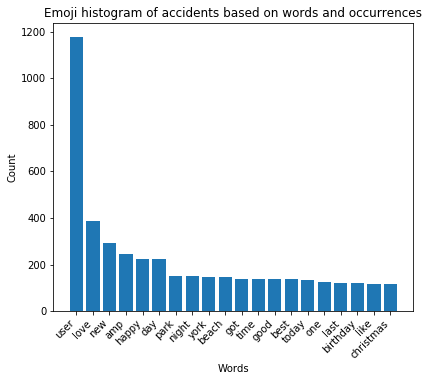

In [28]:
#Here we simply plot the distribution
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(emoji_top_20_val.keys(),emoji_top_20_val.values())
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [ ]:
# Here we multiply the frequency with the rank

In [29]:
li =  []
counter = 1
for elm in emoji_top_20_val.values():
    li.append(elm * counter)
    counter += 1

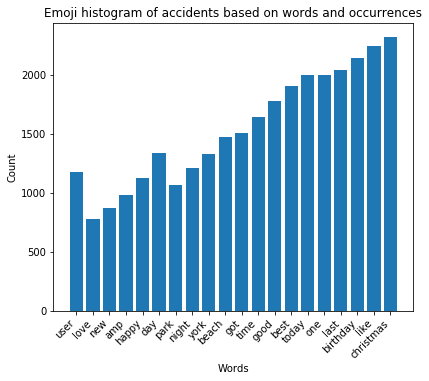

In [30]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(emoji_top_20_val.keys(),li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

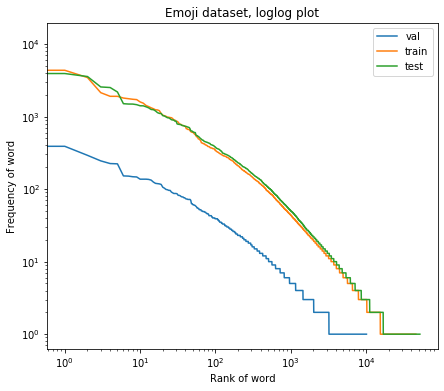

In [32]:
# Getting dict, sorted with most common words as idx 0. 
m1 = most_common_words(emoji_freq_words_val)
m2 = most_common_words(emoji_freq_words_train)
m3 = most_common_words(emoji_freq_words_test)

# Generating x and y values for loglog plot
y1 = m1.values()
x1 = [i for i in range(0,len(y1))]
y2 = m2.values()
x2 = [i for i in range(0,len(y2))]
y3 = m3.values()
x3 = [i for i in range(0,len(y3))]

# Size of fig
plt.figure(figsize = (7,6))

# Plot and labeling
plt.loglog(x1, list(y1), label="val")
plt.loglog(x2, list(y2), label="train")
plt.loglog(x3, list(y3), label="test")

# Labeling axis
plt.xlabel("Rank of word")
plt.ylabel("Frequency of word")
plt.title("Emoji dataset, loglog plot")

# Plotting
plt.legend()
plt.show()

## Offensive dataset

## Size of our offensive vocabulary

In [33]:
print("Number of total words in the vocabulary " + str(len(offensive_freq_words_train)))

Number of total words in the vocabulary 16962


### Top 20 most common tokens 

In [34]:
offensive_top_20_val = top_20_most_common_words(offensive_freq_words_val)
offensive_top_20_train = top_20_most_common_words(offensive_freq_words_train)
offensive_top_20_test = top_20_most_common_words(offensive_freq_words_test)

print('Top 20 in val_text.txt:\n',offensive_top_20_val, '\n')
print('Top 20 in val_train.txt:\n',offensive_top_20_train,'\n')
print('Top 20 in val_test.txt:\n',offensive_top_20_test,'\n')

Top 20 in val_text.txt:
 {'user': 3455, 'liberals': 137, 'gun': 133, 'control': 125, 'antifa': 118, 'like': 109, 'conservatives': 107, 'maga': 98, 'people': 89, 'know': 77, 'get': 73, 'one': 71, 'trump': 69, 'think': 68, 'amp': 62, 'would': 61, 'want': 55, 'us': 52, 'going': 47, 'right': 45} 

Top 20 in val_train.txt:
 {'user': 29961, 'liberals': 1260, 'gun': 1230, 'control': 1095, 'antifa': 1047, 'like': 995, 'maga': 907, 'conservatives': 839, 'people': 830, 'amp': 615, 'get': 586, 'one': 568, 'trump': 565, 'know': 557, 'would': 507, 'think': 483, 'good': 416, 'right': 409, 'time': 349, 'us': 345} 

Top 20 in val_test.txt:
 {'user': 608, 'liberals': 81, 'conservatives': 80, 'antifa': 74, 'like': 65, 'gun': 64, 'control': 64, 'maga': 57, 'get': 51, 'one': 48, 'people': 47, 'trump': 44, 'us': 42, 'love': 38, 'want': 37, 'via': 33, 'know': 31, 'good': 31, 'going': 30, 'new': 30} 



## Top 20 least common tokens

In [35]:
offensive_least_words_val = least_common_words(offensive_freq_words_val)
offensive_least_words_train = least_common_words(offensive_freq_words_train)
offensive_least_words_test = least_common_words(offensive_freq_words_test)
print('Top 20 least common words in offensive_freq_words_val \n',offensive_least_words_val[0:20], '\n')
print('Top 20 least common words in offensive_freq_words_train \n',offensive_least_words_train[0:20], '\n')
print('Top 20 least common words in offensive_freq_words_test \n',offensive_least_words_test[0:20], '\n')

Top 20 least common words in offensive_freq_words_val 
 [('wiiu', 1), ('console', 1), ('az', 1), ('underage', 1), ('lionsden', 1), ('affect', 1), ('hazard', 1), ('club', 1), ('finger', 1), ('aid', 1), ('constituent', 1), ('disclosure', 1), ('etiquette', 1), ('moderation', 1), ('city', 1), ('ft', 1), ('richer', 1), ('sendhim', 1), ('allegation', 1), ('teen', 1)] 

Top 20 least common words in offensive_freq_words_train 
 [('countrymen', 1), ('breitbarters', 1), ('progressing', 1), ('reads', 1), ('unto', 1), ('optic', 1), ('vetsresistsquadron', 1), ('scout', 1), ('lifetimes', 1), ('obummer', 1), ('plethora', 1), ('peruse', 1), ('lighting', 1), ('torches', 1), ('checkmarks', 1), ('verifiedhate', 1), ('lmfaoooooo', 1), ('shitbiscuit', 1), ('tempe', 1), ('licensereporters', 1)] 

Top 20 least common words in offensive_freq_words_test 
 [('ibelieveblaseyford', 1), ('libreal', 1), ('snowflake', 1), ('iran', 1), ('johnkerryiranmeeting', 1), ('angels', 1), ('runs', 1), ('homers', 1), ('connects

## Zipf's Law

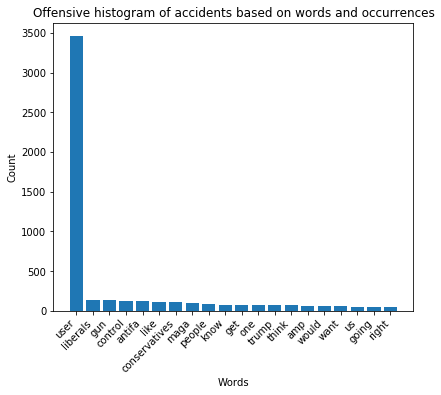

In [36]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(offensive_top_20_val.keys(),offensive_top_20_val.values())
fig.autofmt_xdate(rotation=45)
axes.set_title('Offensive histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [38]:
li =  []
counter = 1
for elm in offensive_top_20_val.values():
    li.append(elm * counter)
    counter += 1

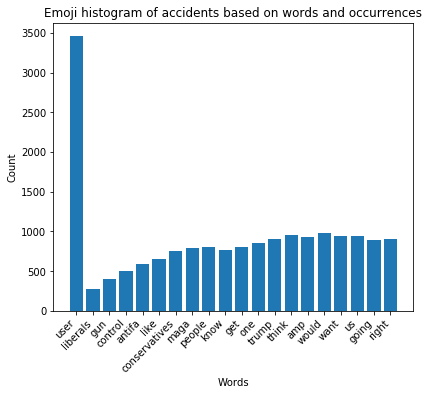

In [40]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(offensive_top_20_val.keys(),li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

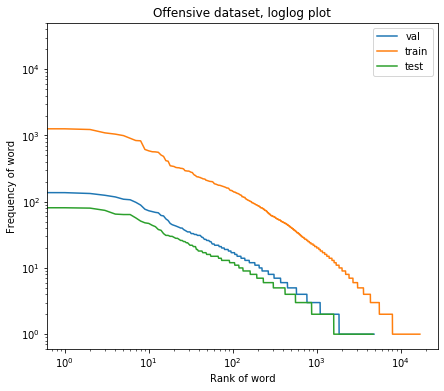

In [37]:
# Getting dict, sorted with most common words as idx 0. 
m1 = most_common_words(offensive_freq_words_val)
m2 = most_common_words(offensive_freq_words_train)
m3 = most_common_words(offensive_freq_words_test)

# Generating x and y values for loglog plot
y1 = m1.values()
x1 = [i for i in range(0,len(y1))]
y2 = m2.values()
x2 = [i for i in range(0,len(y2))]
y3 = m3.values()
x3 = [i for i in range(0,len(y3))]

# Size of fig
plt.figure(figsize = (7,6))

# Plot and labeling
plt.loglog(x1, list(y1), label="val")
plt.loglog(x2, list(y2), label="train")
plt.loglog(x3, list(y3), label="test")

# Labeling axis
plt.xlabel("Rank of word")
plt.ylabel("Frequency of word")
plt.title("Offensive dataset, loglog plot")

# Plotting
plt.legend()
plt.show()

There is an overall trend that the follows 